In [25]:
import pickle
import matplotlib.pyplot as plt
import igraph as ig
import os
from tqdm import tqdm

In [19]:
# Matplotlib defaults

font = {"family" : "normal",
    "size" : 22}

for key, value in font.items():
    plt.rcParams.update({"font." + key : value})

# Analyze fragment diversity

Do fragments change as MA increases?

## Test 1: number of fragments over time

In [3]:
def build_month_increments(start, stop):
    """ Build all monthly increments from the start year to stop year in the
    format YEAR-MONTH

    Args:
        start (int): start year of increments
        stop (int): end year of increments

    Returns:
        list: list of strings holding the YEAR-MONTH increments
    """
    months = []
    while start <= stop:
        for month in [
                "01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
                "11", "12"
        ]:
            months.append(str(start) + "-" + month)
        start += 1

    return months

In [12]:
def get_monthly_frags(month):
    return pickle.load(file=open("Data/AssemblyValues/Fragments/newFrags_" + month + ".p", "rb"))


In [ ]:
months = build_month_increments(1980, 2019)

frags = []

for month in months:
    frags.append(get_monthly_frags(month))

In [16]:
#Graph number of fragments over time
sizes = []
for month_frags in frags:
    sizes.append(len(month_frags))

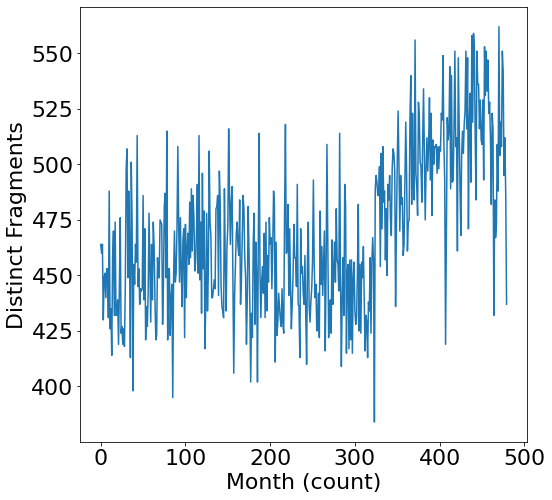

In [23]:
    """ General thought - small increase, but not definitive
    """

plt.figure(figsize=(8,8))

plt.plot(sizes)

plt.xlabel("Month (count)")
plt.ylabel("Distinct Fragments")

plt.show()

## Step 2: different _types_ of fragments

Are there increasing numbers of different types (aka those not seen before) as time increases?

In [41]:
## Get a master list of fragments (starting with 1980-01)

all_frags = frags[0] #1980-01 fragments

In [ ]:
## Testing: find new fragments in 1980-02, and count the number of additions

months = build_month_increments(1980, 2019)
new_frag_count = []

for i in range(1, len(frags)):
    new_frags = 0
    print("----- Analyzing", months[i], "-----")

    current_allfrags_size = len(all_frags)

    #Test all monthly fragments...
    for candidate_f in tqdm(frags[i]):
    
        is_unique = True

        #...against all unique fragments...
        for frag in all_frags[:current_allfrags_size]:
            if candidate_f.isomorphic_vf2(frag,
                                            color1=candidate_f.vs["color"],
                                            color2=frag.vs["color"],
                                            edge_color1=candidate_f.es["color"],
                                            edge_color2=frag.es["color"]):
                #...if candidate is isomorphic, it is not unique, therefore break off check...
                is_unique = False
                break
        
        #...if it makes it through the full list of fragments, it is unique!
        if is_unique:
            all_frags.append(candidate_f)
            new_frags += 1

    new_frag_count.append(new_frags)


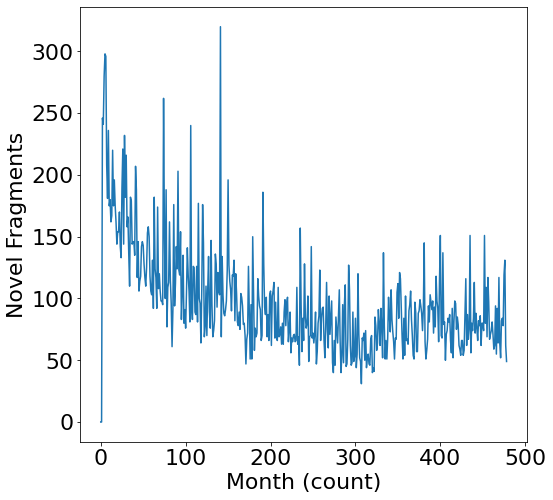

In [44]:
plt.figure(figsize=(8,8))

plt.plot(new_frag_count)

plt.xlabel("Month (count)")
plt.ylabel("Novel Fragments")

plt.show()